In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
country_df = pd.read_csv("C:/Users/DeLL/Downloads/Country-data.csv")

In [3]:
country_df.head(5)

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
#checking null values
country_df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
country_df.shape

(167, 10)

In [6]:
country_df.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

Hence we are having data about 167 countries

In [7]:
#some visualisation
#Here we are going to write a function that makes a plot of top10 countries in each category
def plot_func(y):
    sns.barplot(data = (country_df.sort_values(ascending=False,by=y)).head(10),x='country',y=y)
    plt.xticks(rotation = 90)
    

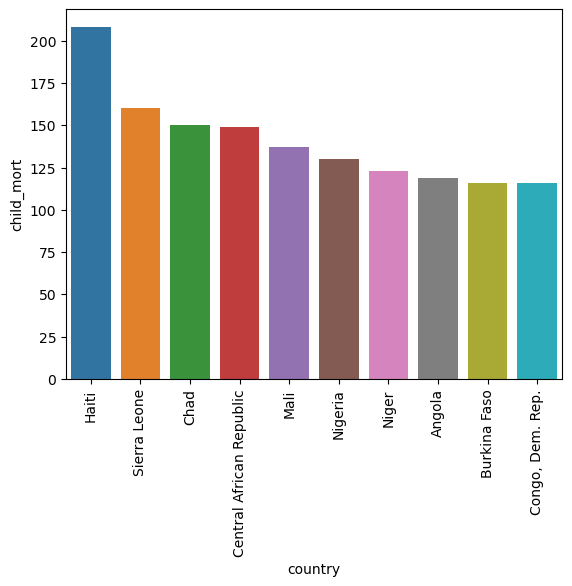

In [8]:
plot_func('child_mort')

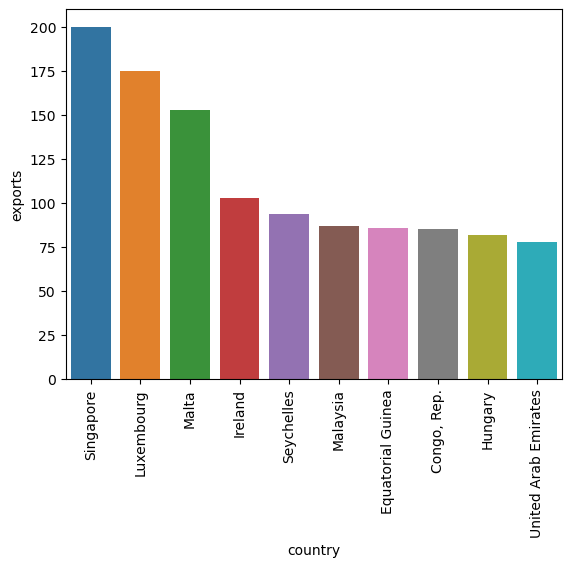

In [9]:
plot_func('exports')

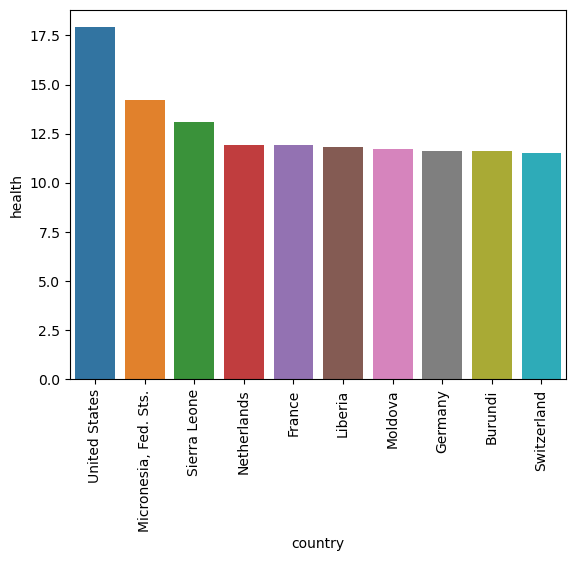

In [10]:
plot_func('health')

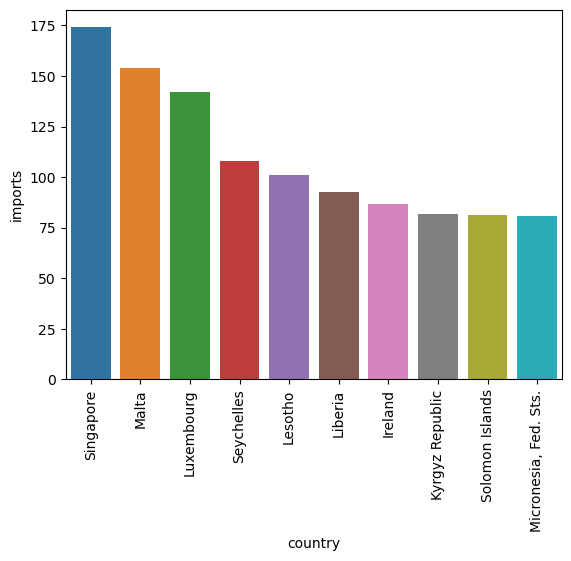

In [11]:
plot_func('imports')

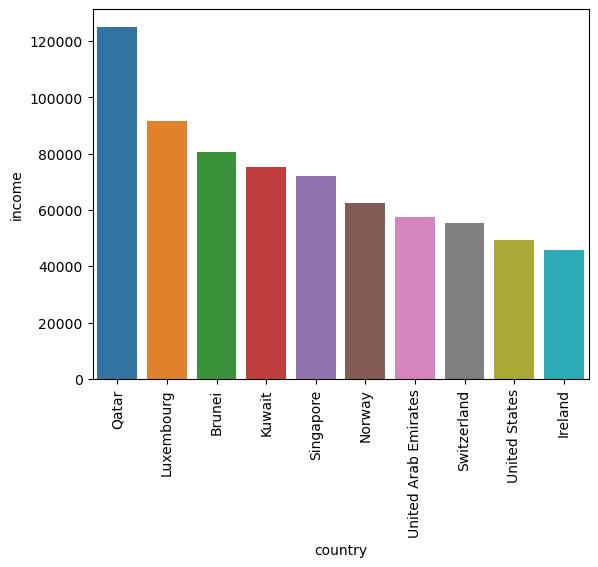

In [12]:
plot_func('income')

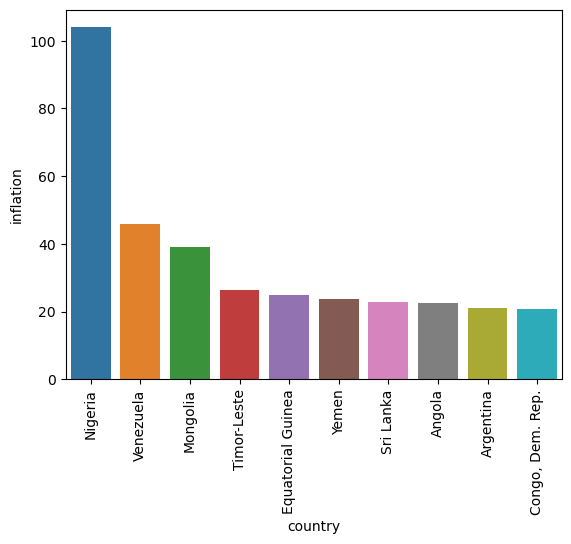

In [13]:
plot_func('inflation')

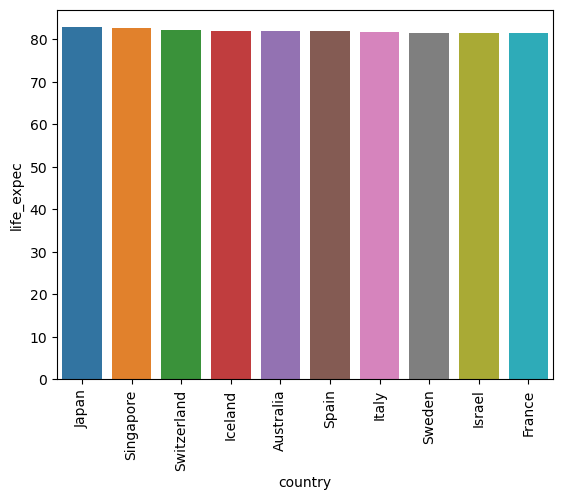

In [14]:
plot_func('life_expec')

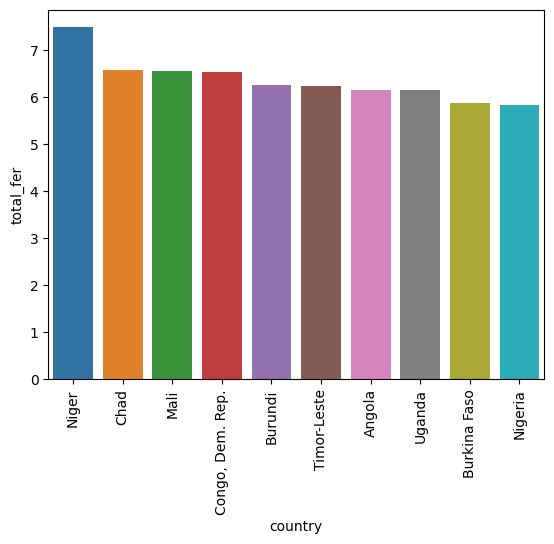

In [15]:
plot_func('total_fer')

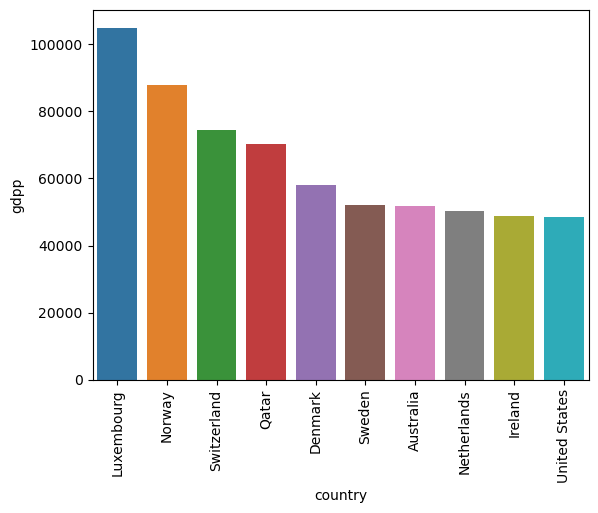

In [16]:
plot_func('gdpp')

In [17]:
country_df.corr()

child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.318093 -0.200402 -0.127211 -0.524315   0.288276   
exports      -0.318093  1.000000 -0.114408  0.737381  0.516784  -0.107294   
health       -0.200402 -0.114408  1.000000  0.095717  0.129579  -0.255376   
imports      -0.127211  0.737381  0.095717  1.000000  0.122406  -0.246994   
income       -0.524315  0.516784  0.129579  0.122406  1.000000  -0.147756   
inflation     0.288276 -0.107294 -0.255376 -0.246994 -0.147756   1.000000   
life_expec   -0.886676  0.316313  0.210692  0.054391  0.611962  -0.239705   
total_fer     0.848478 -0.320011 -0.196674 -0.159048 -0.501840   0.316921   
gdpp         -0.483032  0.418725  0.345966  0.115498  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.316313  -0.320011  0.418725  
health        0.210692  -0.196674  0.345966  
imports       0.054391  -0.159048  0.115498  
income        0.611962  -0.501840  0.895571  
inflation    -0.239705   0.316921 -0.221631  
life_expec    1.000000  -0.760875  0.600089  
total_fer    -0.760875   1.000000 -0.454910  
gdpp          0.600089  -0.454910  1.000000

<AxesSubplot:>

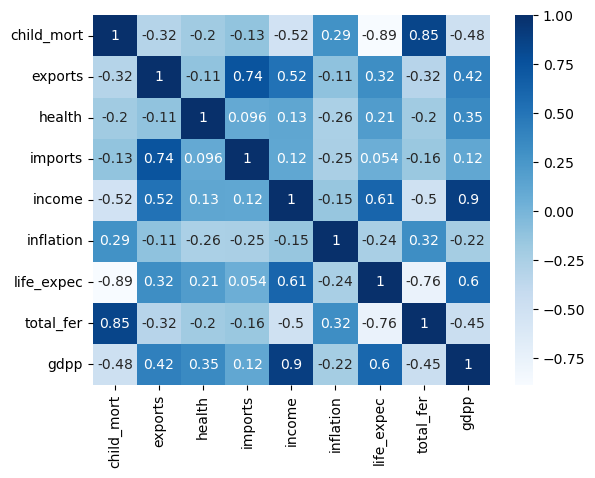

In [18]:
sns.heatmap(country_df.corr(),annot = True, cmap="Blues")

In [19]:
## Scaling the given data-set
from sklearn.preprocessing import MinMaxScaler
country_df1 = pd.DataFrame(country_df.drop('country',axis=1))
scaler = MinMaxScaler()
scaler.fit(country_df1)

MinMaxScaler()

In [20]:
country_df1 = pd.DataFrame(scaler.transform(country_df1),
                           columns=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer' , 'gdpp'])

In [21]:
country_df1

child_mort   exports    health   imports    income  inflation  \
0      0.426485  0.049482  0.358608  0.257765  0.008047   0.126144   
1      0.068160  0.139531  0.294593  0.279037  0.074933   0.080399   
2      0.120253  0.191559  0.146675  0.180149  0.098809   0.187691   
3      0.566699  0.311125  0.064636  0.246266  0.042535   0.245911   
4      0.037488  0.227079  0.262275  0.338255  0.148652   0.052213   
..          ...       ...       ...       ...       ...        ...   
162    0.129503  0.232582  0.213797  0.302609  0.018820   0.063118   
163    0.070594  0.142032  0.192666  0.100809  0.127750   0.463081   
164    0.100779  0.359651  0.312617  0.460715  0.031200   0.150725   
165    0.261441  0.149536  0.209447  0.197397  0.031120   0.257000   
166    0.391918  0.184556  0.253574  0.177275  0.021473   0.168284   

     life_expec  total_fer      gdpp  
0      0.475345   0.736593  0.003073  
1      0.871795   0.078864  0.036833  
2      0.875740   0.274448  0.040365  
3      0.552268   0.790221  0.031488  
4      0.881657   0.154574  0.114242  
..          ...        ...       ...  
162    0.609467   0.370662  0.026143  
163    0.854043   0.208202  0.126650  
164    0.808679   0.126183  0.010299  
165    0.698225   0.555205  0.010299  
166    0.392505   0.670347  0.011731  

[167 rows x 9 columns]

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(country_df1)

PCA()

Text(0.5, 1.0, 'Scree Plot')

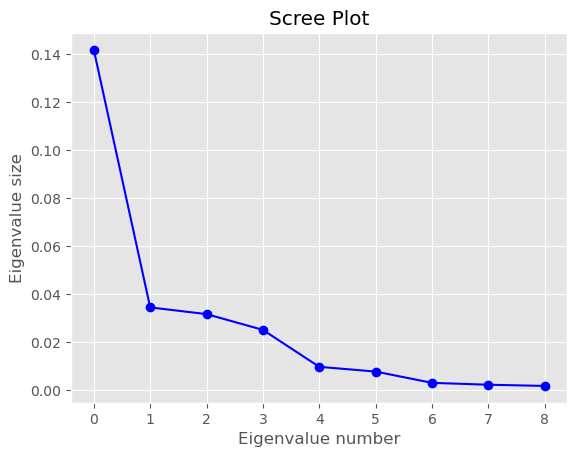

In [23]:
plt.style.use("ggplot") 
plt.plot(pca.explained_variance_, marker='o',color='blue')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

we can see that after index 2 change is very less so our cutoff is 2

In [24]:
pca = PCA(n_components= 2)
pca.fit(country_df1)
pca_df = pd.DataFrame(pca.transform(country_df1),columns = ['col1','col2'])

In [25]:
pca_df

col1      col2
0   -0.599078  0.095490
1    0.158474 -0.212092
2    0.003686 -0.135867
3   -0.650235  0.275975
4    0.200711 -0.064662
..        ...       ...
162 -0.160078 -0.029625
163  0.061133 -0.171339
164  0.115512 -0.032034
165 -0.332968 -0.019824
166 -0.573897  0.108788

[167 rows x 2 columns]

In [26]:
##Clustering Using K-means
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters=3,random_state=42)

In [27]:
model1.fit(pca_df)

KMeans(n_clusters=3, random_state=42)

In [28]:
model1.inertia_

6.914564680454038

Text(0, 0.5, 'Inertia')

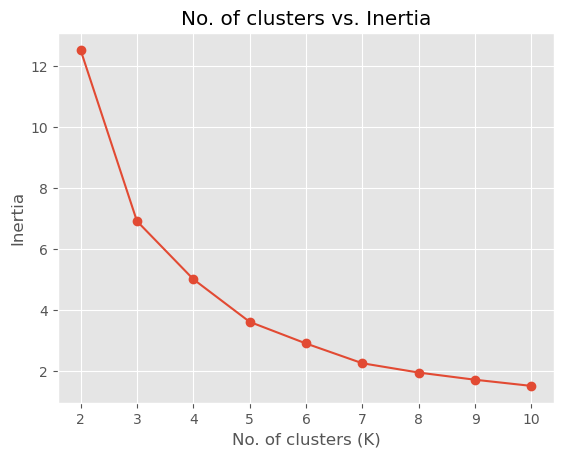

In [29]:
option = range(2,11)
inertia = []

for n_cluster in option:
    model = KMeans(n_cluster,random_state = 42).fit(pca_df)
    inertia.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(option,inertia,'-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia')

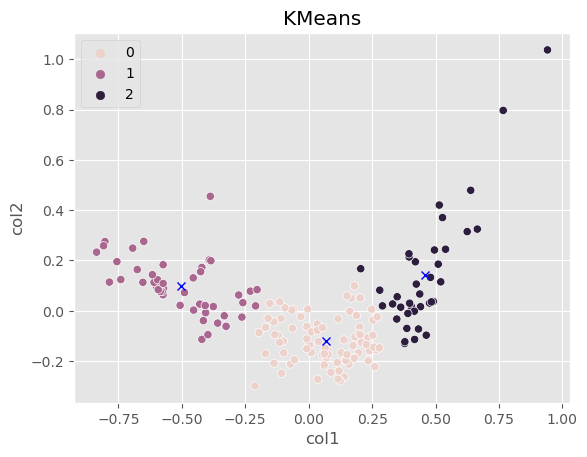

In [30]:
sns.scatterplot(data = pca_df,x='col1',y='col2',hue = model1.predict(pca_df)).set_title('KMeans')
centres_x , centres_y = model1.cluster_centers_[:,0],model1.cluster_centers_[:,1]
plt.plot(centres_x,centres_y,'xb')

In [31]:
clusters = model1.fit_predict(pca_df)

In [32]:
country_df['clusters'] = clusters

In [33]:
country_df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  clusters  
0         9.44        56.2       5.82    553         1  
1         4.49        76.3       1.65   4090         0  
2        16.10        76.5       2.89   4460         0  
3        22.40        60.1       6.16   3530         1  
4         1.44        76.8       2.13  12200         0  
..         ...         ...        ...    ...       ...  
162       2.62        63.0       3.50   2970         0  
163      45.90        75.4       2.47  13500         0  
164      12.10        73.1       1.95   1310         0  
165      23.60        67.5       4.67   1310         1  
166      14.00        52.0       5.40   1460         1  

[167 rows x 11 columns]

<AxesSubplot:xlabel='clusters', ylabel='count'>

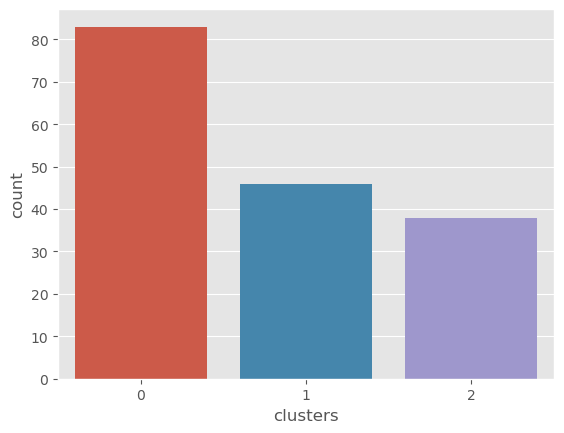

In [34]:
sns.countplot(x=country_df['clusters'])

In [35]:
#### Heirarichal Clustering
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(n_clusters=3,linkage='ward')
model3 = AgglomerativeClustering(n_clusters=3,linkage='average')
model4 = AgglomerativeClustering(n_clusters=3,linkage='complete')
model5 = AgglomerativeClustering(n_clusters=3,linkage='single')

Text(0.5, 1.0, 'ward')

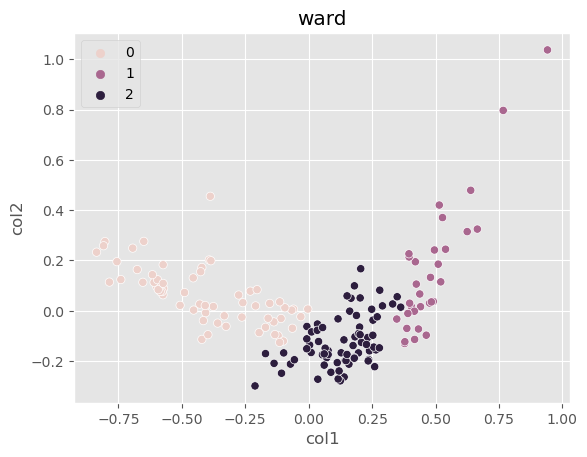

In [36]:
sns.scatterplot(data = pca_df,x='col1',y='col2',hue = model2.fit_predict(pca_df)).set_title('ward')

Text(0.5, 1.0, 'Average')

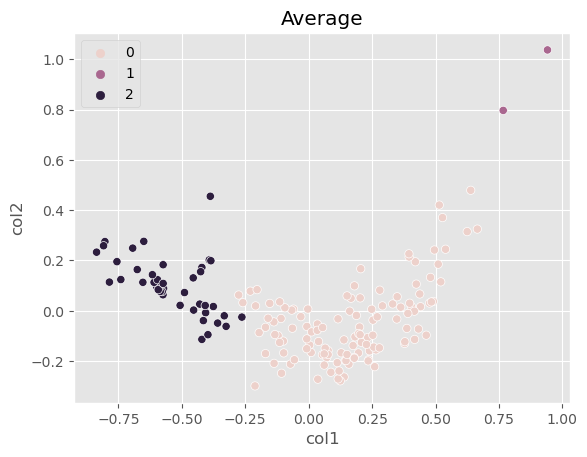

In [37]:
sns.scatterplot(data = pca_df,x='col1',y='col2',hue = model3.fit_predict(pca_df)).set_title('Average')

Text(0.5, 1.0, 'Complete')

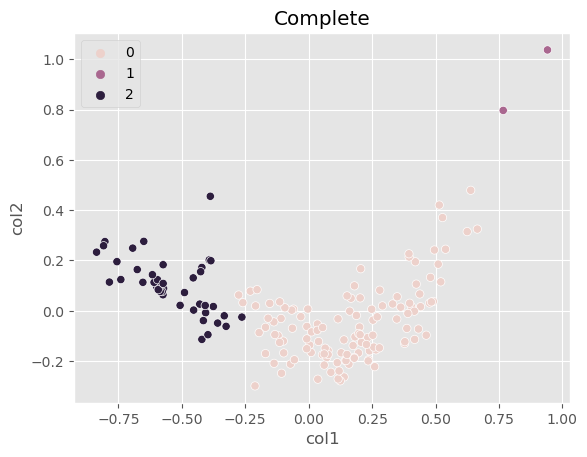

In [38]:
sns.scatterplot(data = pca_df,x='col1',y='col2',hue = model4.fit_predict(pca_df)).set_title('Complete')

Text(0.5, 1.0, 'Single')

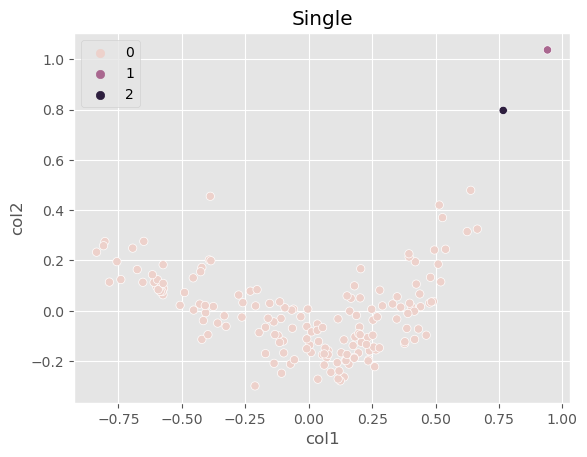

In [39]:
sns.scatterplot(data = pca_df,x='col1',y='col2',hue = model5.fit_predict(pca_df)).set_title('Single')

Clearly KMeans clustering is similar to Agglomerative clustering with linkage Ward

In [40]:
clusters1 = model2.fit_predict(pca_df)
country_df['clusters1'] = clusters1
country_df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  clusters  clusters1  
0         9.44        56.2       5.82    553         1          0  
1         4.49        76.3       1.65   4090         0          2  
2        16.10        76.5       2.89   4460         0          2  
3        22.40        60.1       6.16   3530         1          0  
4         1.44        76.8       2.13  12200         0          2  
..         ...         ...        ...    ...       ...        ...  
162       2.62        63.0       3.50   2970         0          0  
163      45.90        75.4       2.47  13500         0          2  
164      12.10        73.1       1.95   1310         0          2  
165      23.60        67.5       4.67   1310         1          0  
166      14.00        52.0       5.40   1460         1          0  

[167 rows x 12 columns]

Text(0.5, 1.0, 'GDP for KMeans cluster')

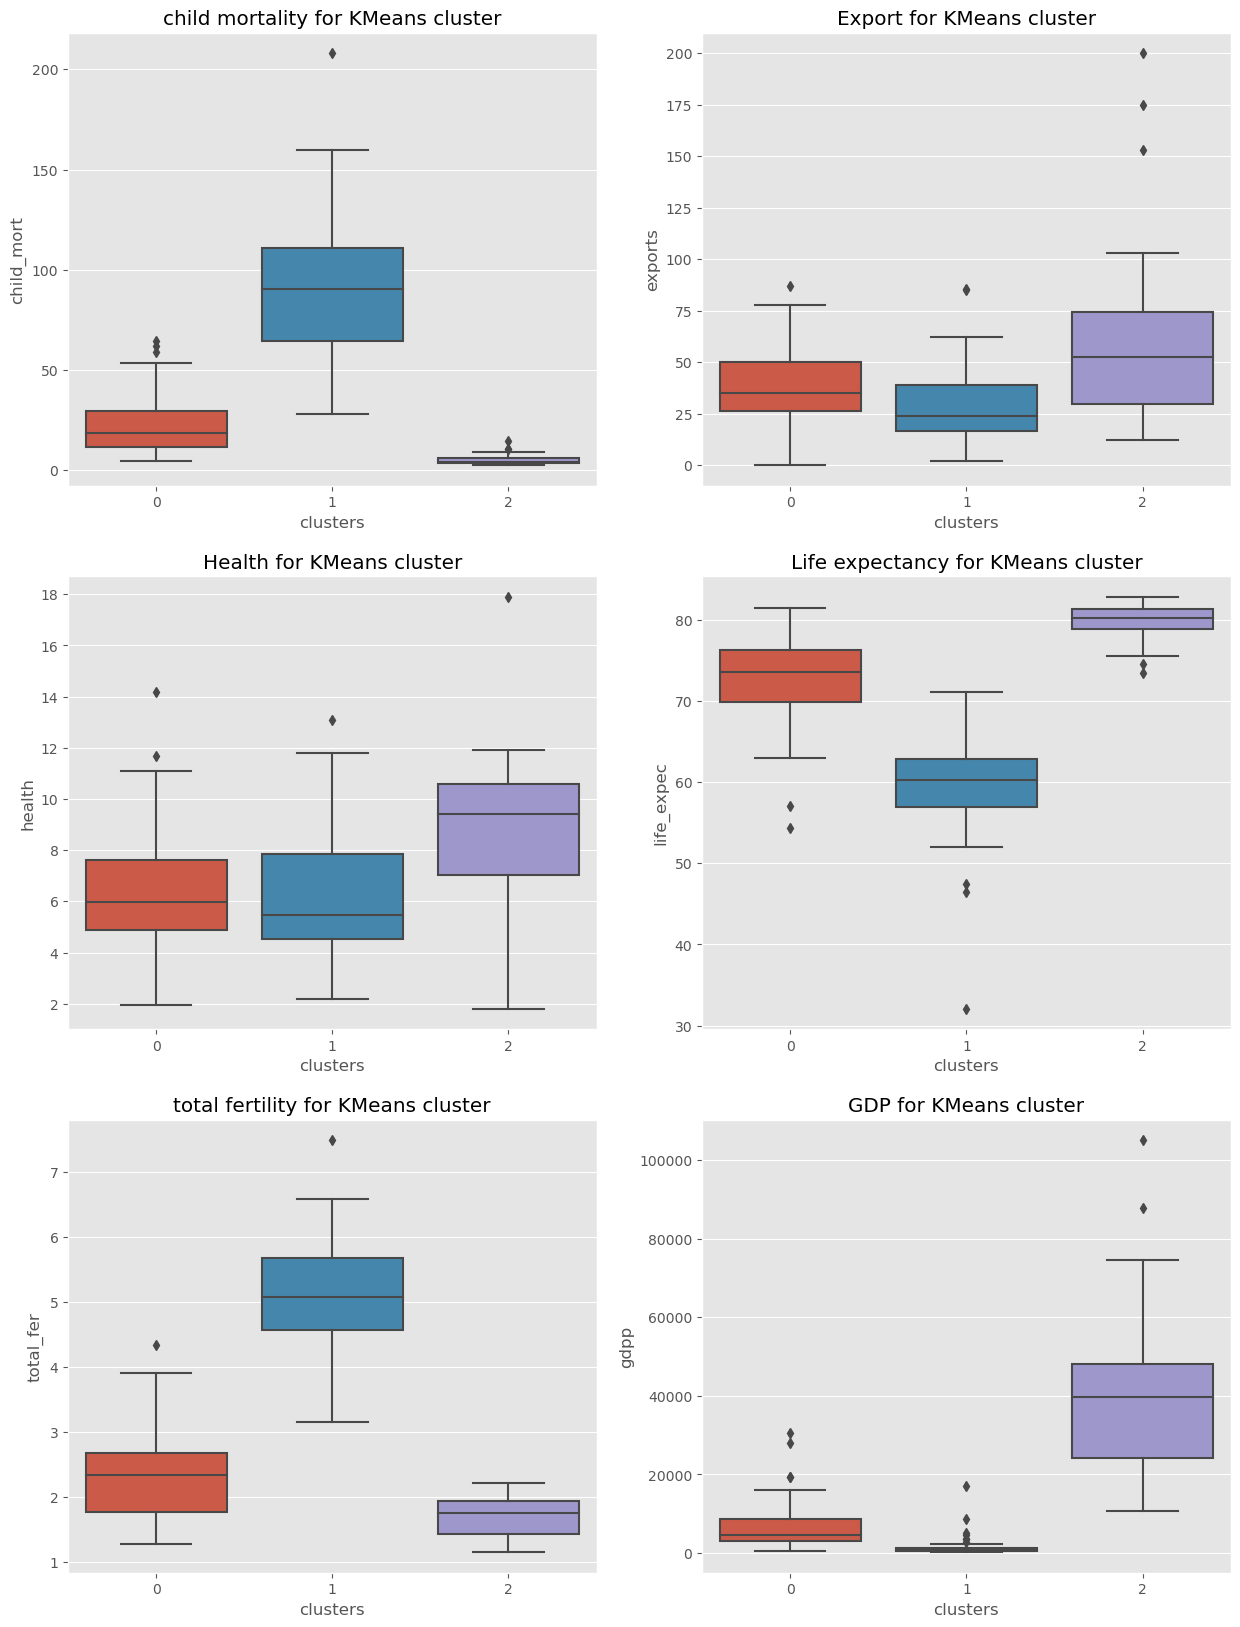

In [41]:
fig,ax = plt.subplots(nrows = 3, ncols = 2 , figsize = (15,20))
plt.subplot(3,2,1)
sns.boxplot(x='clusters',y='child_mort',data = country_df).set_title('child mortality for KMeans cluster')

plt.subplot(3,2,2)
sns.boxplot(x='clusters',y='exports',data = country_df).set_title('Export for KMeans cluster')

plt.subplot(3,2,3)
sns.boxplot(x='clusters',y='health',data = country_df).set_title('Health for KMeans cluster')

plt.subplot(3,2,4)
sns.boxplot(x='clusters',y='life_expec',data = country_df).set_title('Life expectancy for KMeans cluster')

plt.subplot(3,2,5)
sns.boxplot(x='clusters',y='total_fer',data = country_df).set_title('total fertility for KMeans cluster')

plt.subplot(3,2,6)
sns.boxplot(x='clusters',y='gdpp',data = country_df).set_title('GDP for KMeans cluster')


From the above boxplot we have made following conclusion:
cluster_0:Moderate Condition
cluster_1:Very poor Condition
cluster_2:Good Condition

Text(0.5, 1.0, 'GDP for AGG cluster')

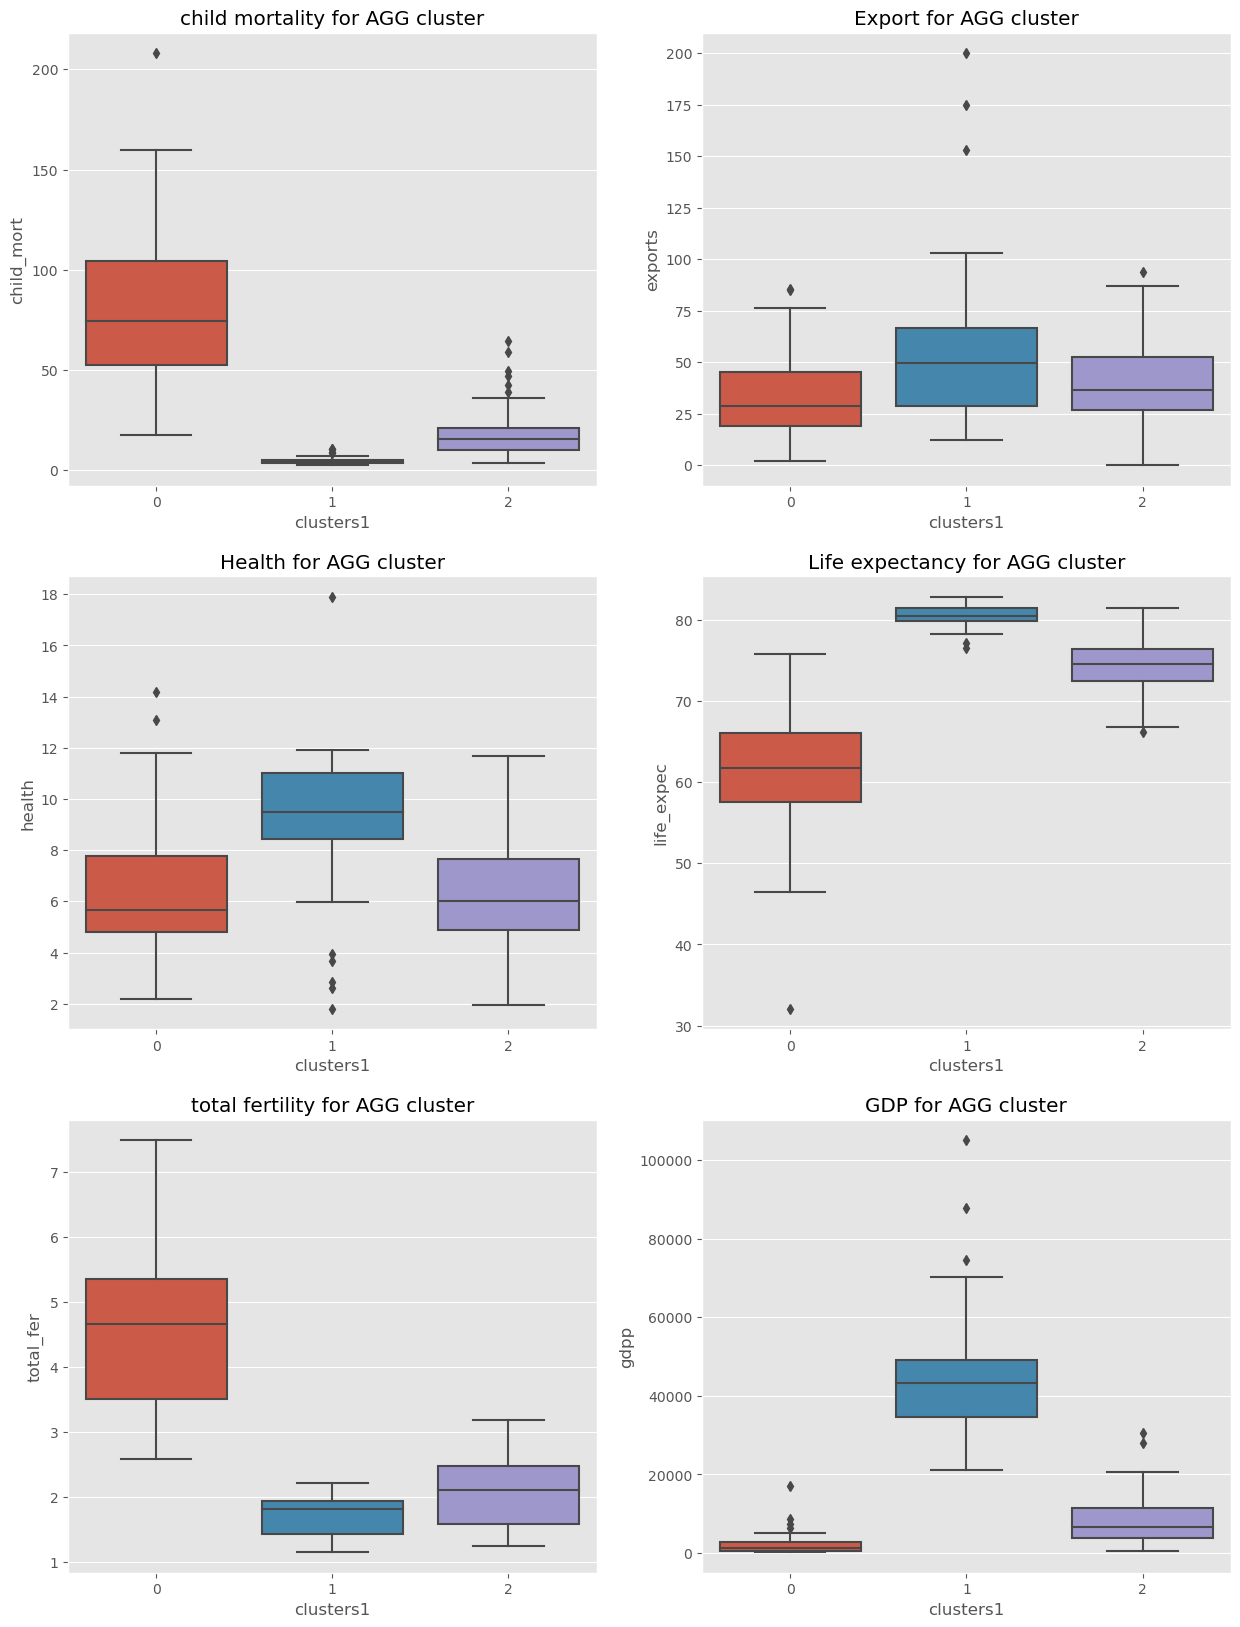

In [42]:
fig,ax = plt.subplots(nrows = 3, ncols = 2 , figsize = (15,20))
plt.subplot(3,2,1)
sns.boxplot(x='clusters1',y='child_mort',data = country_df).set_title('child mortality for AGG cluster')

plt.subplot(3,2,2)
sns.boxplot(x='clusters1',y='exports',data = country_df).set_title('Export for AGG cluster')

plt.subplot(3,2,3)
sns.boxplot(x='clusters1',y='health',data = country_df).set_title('Health for AGG cluster')

plt.subplot(3,2,4)
sns.boxplot(x='clusters1',y='life_expec',data = country_df).set_title('Life expectancy for AGG cluster')

plt.subplot(3,2,5)
sns.boxplot(x='clusters1',y='total_fer',data = country_df).set_title('total fertility for AGG cluster')

plt.subplot(3,2,6)
sns.boxplot(x='clusters1',y='gdpp',data = country_df).set_title('GDP for AGG cluster')


From the above boxplot we have made following conclusion: cluster_0:Poor Condition cluster_1:Good Condition cluster_2:Moderate Condition

In [43]:
country_df['clusters'].loc[country_df['clusters'] == 0] = 'Moderate Condition'
country_df['clusters'].loc[country_df['clusters'] == 1] = 'Poor Condition'
country_df['clusters'].loc[country_df['clusters'] == 2] = 'Good Condition'

In [44]:
fig = px.choropleth(country_df[['country','clusters']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Population condition of world with k_means',
                    color = country_df['clusters'],  
                    color_discrete_map={'Poor Condition':'Red',
                                        'Moderate Condition':'Orange',
                                        'Good Condition':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [45]:
country_df['clusters1'].loc[country_df['clusters1'] == 2] = 'Moderate Condition'
country_df['clusters1'].loc[country_df['clusters1'] == 0] = 'Poor Condition'
country_df['clusters1'].loc[country_df['clusters1'] == 1] = 'Good Condition'

In [46]:
fig = px.choropleth(country_df[['country','clusters1']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Population condition of world with AGG Clustering',
                    color = country_df['clusters1'],  
                    color_discrete_map={'Poor Condition':'Red',
                                        'Moderate Condition':'Orange',
                                        'Good Condition':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')